In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Main expressions

$$
\log P(C|L) = \log P(C|\hat{T}L) + \log\frac{\sigma_{T|C}}{\sigma_T}
$$
Or
$$
\log\sigma_{T|C} - \log \sigma_T = \log P(C|L) - \log P(C|\hat{T}L)
$$

# Faffing

In [15]:
def dir_pa(p1, p2, n):
    a = 1/n - 1
    prfct = 1/ (n ** 2)
    return prfct * p1**a * p2**a

p = np.linspace(0.01, 1, 100)
p1, p2 = np.meshgrid(p, p)
P_dir = dir_pa(p1, p2, 10)
P_dir.shape

(100, 100)

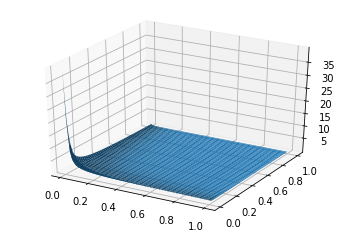

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(p1, p2, P_dir)

In [29]:
from scipy.special import gamma
def Dir2(p, u):
#     return (gamma(2*u) / gamma(u)**2) * p**(u-1) + (1 - p)**(u-1)
    return p**(u-1) + (1 - p)**(u-1)

def check(p):
    return p**0.3 * (1-p)**0.3

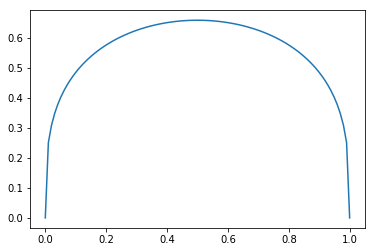

In [30]:
p = np.linspace(0, 1, 100)
plt.plot(p, check(p))

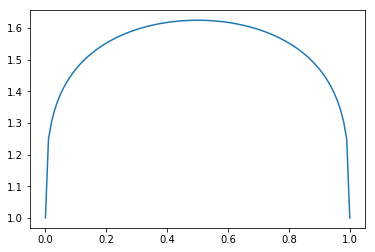

In [31]:
plt.plot(p, Dir2(p, 1.3))


In [56]:
class llist(object):
    def __init__(self, val, _next=None):
        self.val = val
        self._next = _next
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self._next is None:
            raise StopIteration
        else:
            return self._next
        
    def __repr__(self):
        return str(self.val)

In [57]:
x5 = llist(5)
x5, x5._next

(5, None)

In [58]:
x4 = llist(4, x5)

In [59]:
x4, x4._next

(4, 5)

In [60]:
next(x4)

5

In [62]:
next(x4)

5

In [46]:
xlist = llist(1, llist(2, llist(3, None)))

# Code
$$
\log\sigma_{T|C} - \log \sigma_T = \log P(C|L) - \log P(C|\hat{T}L)
$$

$$
\log P(C|L) = -n^2\log n + \sum_i\sum_j C_{ij}\log\frac{C_{ij}}{C_i}
$$
$$
\log P(C|\hat{T}L) = \sum_i\sum_j C_{ij}\log\frac{C_{ij}}{C_i}
$$
$$
\sigma_T = P(\hat{T}|L)^{-1}
$$
$$
\log P(\hat{T}|L) = -n^2\log n +  
(1/n - 1)\sum_i\sum_j\log\frac{C_{ij}}{C_i}
$$


### `calc_T_max_L`

$$
\hat{T}_L = {\rm argmax}_T P(C|TL) ~:~\hat{T}_{ij} = \frac{C_{ij}}{C_i}
$$

### `calc_T_max_J`
$$
\hat{T}_J = {\rm argmax}_T P(CT|L) ~:~\hat{T}_{ij} 
= \frac{C_{ij}+1/n-1}{C_i+1-n}
$$

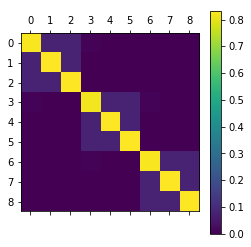

In [2]:
from BowmanModel import BowmanModel
m = BowmanModel()

def calc_T_max_L(C):
    "Calculate T that maximizes likelihood, P(C|TL)"
    Ci = C.sum(axis=1)
    return C / Ci.reshape(C.shape[0], 1)

def calc_T_max_J(C):
    "Calculate T that maximizes joint probability, P(CT|L)"
    n = C.shape[0]
    Ci = C.sum(axis=1)
    return (C + 1/n - 1) / (Ci.reshape(n, 1) + 1 - n)
    
plt.matshow(calc_T_max_L(m.C))
plt.colorbar()

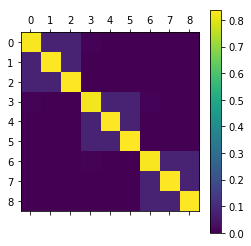

In [3]:
plt.matshow(calc_T_max_J(m.C))
plt.colorbar()

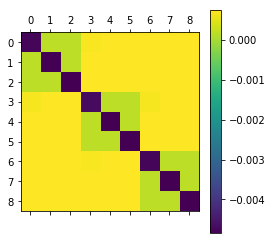

In [4]:
plt.matshow(calc_T_max_L(m.C) - calc_T_max_J(m.C))
plt.colorbar()

### `calc_log_evidence_Bowman`
$$
  \log P(C|L) \approx \sum_i\sum_jC_{ij}\log\frac{C_{ij}}{C_i} - n^2\log n
$$

### `calc_log_evidence_uniform`
$$
  \log P(C|L) \approx \sum_i\sum_j C_{ij}\log C_{ij} - \sum_i(C_i+n-1)\log(C_i+n-1) \\ + n(n-1)\log(n-1)
$$

In [5]:
from BowmanModel import BowmanModel
m = BowmanModel()

def calc_T_max_L(C):
    "Calculate T that maximizes likelihood, P(C|TL)"
    Ci = C.sum(axis=1)
    return C / Ci.reshape(C.shape[0], 1)

def calc_T_max_J(C):
    "Calculate T that maximizes joint probability, P(CT|L)"
    n = C.shape[0]
    Ci = C.sum(axis=1)
    return (C + 1/n - 1) / (Ci.reshape(n, 1) + 1 - n)

def calc_log(A):
    with np.errstate(divide='ignore', invalid='ignore'):
        logA = np.log(A)
        logA[np.isneginf(logA) | np.isnan(logA)] = 0
    return logA

def calc_log_evidence_Bowman(C):
    n = C.shape[0]
    T = calc_T_max_L(C)
    return np.sum(C * calc_log(T)) - n**2 * np.log(n)

def calc_log_evidence_uniform(C):
    n = C.shape[0]
    sumCij = np.sum(C * calc_log(C))
    Ci = C.sum(axis=1) + n - 1
    sumCi = np.sum(Ci * calc_log(Ci))
    logn = n * (n-1) * np.log(n-1)
    return sumCij - sumCi + logn

calc_log_evidence_Bowman(m.C), calc_log_evidence_uniform(m.C)

(-6555.811665978547, -6811.132393155604)

### `calc_log_likelihood`
$$
\log P(C|\hat{T}L) = \sum_i\sum_j C_{ij}\log \hat{T}_{ij}
$$

* Note: the sum is only over observed transitions

In [8]:
def calc_log_likelihood(C, T):
    return np.sum(C * calc_log(T))

calc_log_likelihood(m.C, calc_T_max_L(m.C)),\
calc_log_likelihood(m.C, calc_T_max_J(m.C))

(-6377.836475214313, -6342.18398677519)

### `calc_log_OF`
$$
\log\frac{\sigma_{T|C}}{\sigma_T} = \log P(C|L) - \log P(C|\hat{T}L)
$$

In [10]:
def calc_log_OF(log_evidence, log_likelihood):
    return log_evidence - log_likelihood

log_evidence = calc_log_evidence_Bowman(m.C)
log_likelihood = calc_log_likelihood(m.C, calc_T_max_L(m.C))
calc_log_OF(log_evidence, log_likelihood)

-177.97519076423396

### `calc_log_sigma_T`
Uniform prior
$$
\log\sigma_T = -n\log\Gamma(n) \sim n(n-1)[\log(n-1) - 1]
$$
Else
$$
\log\sigma_T = P(\hat{T}|L)^{-1}
$$

### `calc_log_sigma_T`
$$
\log\sigma_{T|C} = \log OF + \log\sigma_T
$$

In [63]:
def calc_log_sigma_T_uniform(n):
    return -n * (n-1) * (np.log(n-1) - 1)

def calc_log_sigma_T_Bowman(T):
    n = T.shape[0]
    return n**2 * np.log(n) + (1 - 1/n) * np.sum(calc_log(T))

def calc_log_sigma_TC(log_OF, log_sigma_T):
    return log_OF + log_sigma_T

calc_log_sigma_T_uniform(m.C.shape[0]), \
calc_log_sigma_T_Bowman(calc_T_L(m.C))

(77.71979100094818, 94.38243277783555)

### Code so far

In [25]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from BowmanModel import BowmanModel

def calc_T_max_L(C):
    "Calculate T that maximizes likelihood, P(C|TL)"
    Ci = C.sum(axis=1)
    return C / Ci.reshape(C.shape[0], 1)

def calc_T_max_J(C):
    "Calculate T that maximizes joint probability, P(CT|L)"
    n = C.shape[0]
    Ci = C.sum(axis=1)
    return (C + 1/n - 1) / (Ci.reshape(n, 1) + 1 - n)

def calc_log(A):
    with np.errstate(divide='ignore', invalid='ignore'):
        logA = np.log(A)
        logA[np.isneginf(logA) | np.isnan(logA)] = 0
    return logA

def calc_log_evidence_Bowman(C):
    n = C.shape[0]
    T = calc_T_max_L(C)
    return np.sum(C * calc_log(T)) - n**2 * np.log(n)

def calc_log_evidence_uniform(C):
    n = C.shape[0]
    Ci = C.sum(axis=1) + n - 1
    term_sumCij = np.sum(C * calc_log(C))
    term_sumCi = np.sum(Ci * calc_log(Ci))
    term_logn = n * (n-1) * np.log(n-1)
    return term_sumCij - term_sumCi + term_logn

def calc_log_likelihood(C, T):
    return np.sum(C * calc_log(T))

def calc_log_OF(log_evidence, log_likelihood):
    return log_evidence - log_likelihood

def calc_log_sigma_T_uniform(T):
    n = T.shape[0]
    return -n * (n-1) * (np.log(n-1) - 1)

def calc_log_sigma_T_maxprior(T):
    n = T.shape[0]
    return n**2 * np.log(n) + (1 - 1/n) * np.sum(calc_log(T))

def calc_log_sigma_TC(log_OF, log_sigma_T):
    return log_OF + log_sigma_T

### `calc_occam_terms_Mackay`

return 
1. $\log\frac{\sigma_{T|C}}{\sigma_T}$
2. $\log\sigma_T$
3. $\log\sigma_{T|C}$
4. $\log P(C|L)$
5. $\log P(C|\hat{T}L)$

In [26]:
def calc_occam_terms_Mackay(C):
    "Return log(OF), log(sigma_T), log(sigma_{T|C}), log(P(C|L)), log(P(C|TL))"
    T = calc_T_max_L(C)
    log_evidence = calc_log_evidence_Bowman(C)
    log_likelihood = calc_log_likelihood(C, T)
    log_OF = calc_log_OF(log_evidence, log_likelihood)
    log_sigma_T = calc_log_sigma_T_maxprior(T)
    log_sigma_TC = calc_log_sigma_TC(log_OF, log_sigma_T)
    return log_OF, log_sigma_T, log_sigma_TC, log_evidence, log_likelihood

m = BowmanModel()
calc_occam_terms_Mackay(m.C)

(-177.97519076423396,
 94.38243277783555,
 -83.59275798639841,
 -6555.811665978547,
 -6377.836475214313)

In [27]:
n = m.C.shape[0]
-n**2 * np.log(n)

-177.9751907642338

In [28]:
c0 = n**2 * np.log(n)
c1 = (1 - 1/n)*np.sum(calc_log(calc_T_max_L(m.C)))
c0 + c1

94.38243277783555

In [29]:
(1 - 1/n) * np.sum(calc_log(calc_T_max_L(m.C)))

-83.59275798639824

### `calc_occam_terms_uniform`

return 
1. $\log\frac{\sigma_{T|C}}{\sigma_T}$
2. $\log\sigma_T$
3. $\log\sigma_{T|C}$
4. $\log P(C|L)$
5. $\log P(C|\hat{T}L)$

In [30]:
def calc_occam_terms_uniform(C):
    "Return log(OF), log(sigma_T), log(sigma_{T|C}), log(P(C|L)), log(P(C|TL))"
    T = calc_T_max_L(C)
    log_evidence = calc_log_evidence_uniform(C)
    log_likelihood = calc_log_likelihood(C, T)
    log_OF = calc_log_OF(log_evidence, log_likelihood)
    log_sigma_T = calc_log_sigma_T_uniform(T)
    log_sigma_TC = calc_log_sigma_TC(log_OF, log_sigma_T)
    return log_OF, log_sigma_T, log_sigma_TC, log_evidence, log_likelihood

calc_occam_terms_uniform(m.C)

(-433.295917941291,
 -77.71979100094818,
 -511.0157089422392,
 -6811.132393155604,
 -6377.836475214313)

In [31]:
Ci = m.C.sum(axis=1)
c0 = np.sum(Ci * calc_log(Ci))
c1 = -np.sum((Ci+n-1) * calc_log(Ci+n-1))
c2 = n * (n-1) * np.log(n-1)
c0 + c1 + c2

-433.29591794129465

In [32]:
-n * (n-1) * (np.log(n-1) - 1)

-77.71979100094818

In [34]:
c0 + c1 + n*(n-1)

-511.0157089422428

### `calc_occam_terms_Bowman`

return 
1. $\log\frac{\sigma_{T|C}}{\sigma_T}$
2. $\log\sigma_T$
3. $\log\sigma_{T|C}$
4. $\log P(C|L)$
5. $\log P(C|\hat{T}L)$

In [35]:
def calc_occam_terms_Bowman(C):
    "Return log(OF), log(sigma_T), log(sigma_{T|C}), log(P(C|L)), log(P(C|TL))"
    T = calc_T_max_J(C)
    log_evidence = calc_log_evidence_Bowman(C)
    log_likelihood = calc_log_likelihood(C, T)
    log_OF = calc_log_OF(log_evidence, log_likelihood)
    log_sigma_T = calc_log_sigma_T_maxprior(T)
    log_sigma_TC = calc_log_sigma_TC(log_OF, log_sigma_T)
    return log_OF, log_sigma_T, log_sigma_TC, log_evidence, log_likelihood

calc_occam_terms_Bowman(m.C)

(-213.62767920335773,
 86.2962571861936,
 -127.33142201716413,
 -6555.811665978547,
 -6342.18398677519)

In [39]:
c0 = -n**2 * np.log(n)
T_ML = calc_T_max_L(m.C)
T_MJ = calc_T_max_J(m.C)
c0 + np.sum(m.C * (calc_log(T_ML) - calc_log(T_MJ)))

-213.62767920335847

In [40]:
-c0 + (1-1/n) * np.sum(calc_log(T_MJ))

86.2962571861936

In [46]:
c1 = np.sum(m.C * calc_log(T_ML))
c2 = np.sum((m.C + 1/n - 1) * calc_log(T_MJ))
c1 - c2

-127.33142201716328

# Do the calculations

In [24]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from BowmanModel import BowmanModel
from occam import calc_occam_terms_Mackay
from occam import calc_occam_terms_uniform
from occam import calc_occam_terms_Bowman

m = BowmanModel()
n = []
occam_terms_Mackay = []
occam_terms_uniform = []
occam_terms_Bowman = []

while len(m.state_list) >= 3:
    n.append(len(m.state_list))
    occam_terms_Mackay.append(calc_occam_terms_Mackay(m.C))
    occam_terms_uniform.append(calc_occam_terms_uniform(m.C))
    occam_terms_Bowman.append(calc_occam_terms_Bowman(m.C))
    m.calc_log_BF_matrix()
    m.merge_best_pair_states()
    
occam_terms_Mackay = np.array(occam_terms_Mackay)
occam_terms_uniform = np.array(occam_terms_uniform)
occam_terms_Bowman = np.array(occam_terms_Bowman)
n

[9, 8, 7, 6, 5, 4, 3]

### Look at Occam factor

* Larger OF's of Mackay, Bowman are due to prior better suiting the true distribution (which is far from uniform)

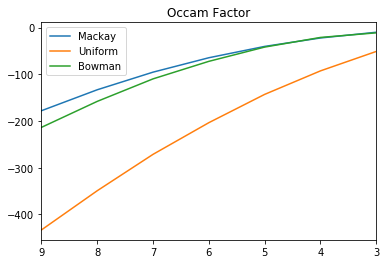

In [35]:
plt.xlim(9, 3)
# logOF = r'$\log\frac{\sigma_{T|C}}{\sigma_T}$'
# logsigT = r'$\log\sigma_T$'
# logsigTC = r'$\log\sigma_{T|C}$'
plt.title('Occam Factor')
plt.plot(n, occam_terms_Mackay[:, 0], label='Mackay')
plt.plot(n, occam_terms_uniform[:, 0], label='Uniform')
plt.plot(n, occam_terms_Bowman[:, 0], label='Bowman')
plt.legend()

### Look at $\log\sigma_{T|C}, \log\sigma_T$

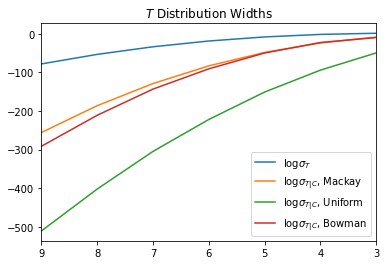

In [38]:
plt.xlim(9, 3)
logOF = r'$\log\frac{\sigma_{T|C}}{\sigma_T}$'
logsigT = r'$\log\sigma_T$'
logsigTC = r'$\log\sigma_{T|C}$'
plt.title('$T$ Distribution Widths')
plt.plot(n, occam_terms_Mackay[:, 1], label=logsigT)
plt.plot(n, occam_terms_Mackay[:, 2], label=logsigTC + ', Mackay')
plt.plot(n, occam_terms_uniform[:, 2], label=logsigTC + ', Uniform')
plt.plot(n, occam_terms_Bowman[:, 2], label=logsigTC + ', Bowman')
plt.legend()

### Maximum likelihood, $\log P(C|\hat{T}L)$

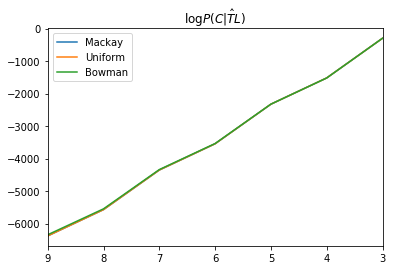

In [41]:
plt.xlim(9, 3)
plt.title(r'$\log P(C|\hat{T}L)$')
plt.plot(n, occam_terms_Mackay[:, 4], label='Mackay')
plt.plot(n, occam_terms_uniform[:, 4], label='Uniform')
plt.plot(n, occam_terms_Bowman[:, 4], label='Bowman')
plt.legend()

### Evidence, $\log P(C|L)$

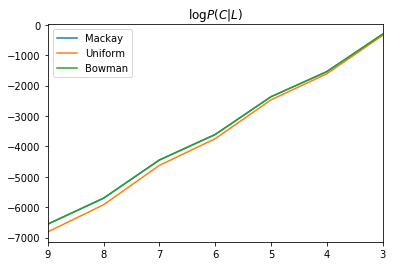

In [42]:
plt.xlim(9, 3)
plt.title(r'$\log P(C|L)$')
plt.plot(n, occam_terms_Mackay[:, 3], label='Mackay')
plt.plot(n, occam_terms_uniform[:, 3], label='Uniform')
plt.plot(n, occam_terms_Bowman[:, 3], label='Bowman')
plt.legend()